# 1.Importation des Librairies

In [46]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('Data/USA_Housing.csv')

In [3]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [15]:
data.info

<bound method DataFrame.info of       Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0         79545.458574             5.682861                   7.009188   
1         79248.642455             6.002900                   6.730821   
2         61287.067179             5.865890                   8.512727   
3         63345.240046             7.188236                   5.586729   
4         59982.197226             5.040555                   7.839388   
...                ...                  ...                        ...   
4995      60567.944140             7.830362                   6.137356   
4996      78491.275435             6.999135                   6.576763   
4997      63390.686886             7.250591                   4.805081   
4998      68001.331235             5.534388                   7.130144   
4999      65510.581804             5.992305                   6.792336   

      Avg. Area Number of Bedrooms  Area Population         Price  \
0         

In [47]:
#Filtrage des donnees
Filtered_data = data[['Avg. Area Income', 'Price']]

In [8]:
X = Filtered_data.iloc[: , : -1].values
Y = Filtered_data.iloc[: , -1].values

In [9]:
X

array([[79545.45857432],
       [79248.64245483],
       [61287.06717866],
       ...,
       [63390.6868855 ],
       [68001.33123509],
       [65510.58180367]])

In [10]:
Y

array([1059033.55787012, 1505890.91484695, 1058987.98787608, ...,
       1030729.58315229, 1198656.87240769, 1298950.48026696])

In [12]:
data['Price'].max()

2469065.5941747027

In [13]:
data['Price'].min()

15938.657923287848

In [16]:
print("Max Price :",data['Price'].max())

Max Price : 2469065.5941747027


In [17]:
print("Min Price :",data['Price'].max())

Min Price : 2469065.5941747027


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
train_test_split(X, Y, test_size = 0.25, random_state= 40)

[array([[61436.91890629],
        [70950.42998672],
        [76388.55195821],
        ...,
        [80807.73283844],
        [94241.82332287],
        [51796.13357753]]),
 array([[75391.68175788],
        [85852.14918103],
        [75537.79451   ],
        ...,
        [61875.0759734 ],
        [78318.81449084],
        [75908.67049714]]),
 array([ 868713.43669433, 1538039.5989439 , 1114729.72452353, ...,
        1304284.2260061 , 2180065.59773864,  891468.21327911]),
 array([1435769.76883739, 1668448.09805727, 1762214.67958189, ...,
         975005.77366035, 1393995.96182827, 1036277.0624633 ])]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state= 40)

In [21]:
print("X-train Shape:",X_train.shape)
print("X-test Shape:",X_test.shape)
print("y-train Shape:",y_train.shape)
print("y-test Shape:",y_test.shape)


X-train Shape: (3750, 1)
X-test Shape: (1250, 1)
y-train Shape: (3750,)
y-test Shape: (1250,)


In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
modele_lineaire = LinearRegression()

In [24]:
modele_lineaire.fit(X_train,y_train)

LinearRegression()

In [26]:
y_price_predits = modele_lineaire.predict(X_test)

In [30]:
print(y_price_predits)

[1375827.6030198  1594792.46082882 1378886.12389639 ... 1092889.80072731
 1437100.12333213 1386649.52532991]


In [29]:
print(y_test)

[1435769.76883739 1668448.09805727 1762214.67958189 ...  975005.77366035
 1393995.96182827 1036277.0624633 ]


In [31]:
resultats= pd.DataFrame(y_test ,y_price_predits)

In [32]:
resultats

,0
1.375828e+06,1.435770e+06
1.594792e+06,1.668448e+06
1.378886e+06,1.762215e+06
1.121330e+06,1.106261e+06
1.001248e+06,1.051124e+06
...,...
9.409852e+05,7.054441e+05
1.629427e+06,1.358647e+06
1.092890e+06,9.750058e+05
1.437100e+06,1.393996e+06


In [33]:
from sklearn.metrics import mean_squared_error, r2_score

In [34]:
print("MSE de la Regression Lineaire:", mean_squared_error(y_test,y_price_predits))

MSE de la Regression Lineaire: 70345556190.3212


In [35]:
print("R2 Score de la regression lineaire:",r2_score(y_test,y_price_predits))

R2 Score de la regression lineaire: 0.43322233931263276


In [36]:
import matplotlib.pyplot as plt

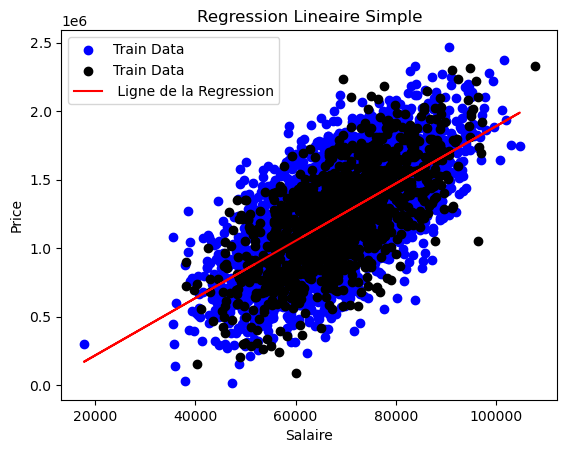

In [37]:
plt.scatter(X_train, y_train, color='blue', label='Train Data')
plt.scatter(X_test, y_test, color='black', label='Train Data')
plt.plot(X_train, modele_lineaire.predict(X_train), color='red', label= ' Ligne de la Regression') 
plt.xlabel('Salaire')
plt.ylabel('Price')
plt.title('Regression Lineaire Simple')
plt.legend()
plt.show()

In [38]:
Filtered_data

,Avg. Area Income,Price
0,79545.458574,1.059034e+06
1,79248.642455,1.505891e+06
2,61287.067179,1.058988e+06
3,63345.240046,1.260617e+06
4,59982.197226,6.309435e+05
...,...,...
4995,60567.944140,1.060194e+06
4996,78491.275435,1.482618e+06
4997,63390.686886,1.030730e+06
4998,68001.331235,1.198657e+06


In [44]:
print(modele_lineaire.predict([[1.059034e+06]]))


[21966026.07465914]


In [42]:
difference=( y_test - y_price_predits)

In [43]:
resultats= pd.DataFrame({'y-Price-reel': y_test ,'y-Price-predits':y_price_predits, 'Difference': difference})
resultats

,y-Price-reel,y-Price-predits,Difference
0,1.435770e+06,1.375828e+06,59942.165818
1,1.668448e+06,1.594792e+06,73655.637228
2,1.762215e+06,1.378886e+06,383328.555685
3,1.106261e+06,1.121330e+06,-15068.763964
4,1.051124e+06,1.001248e+06,49875.895328
...,...,...,...
1245,7.054441e+05,9.409852e+05,-235541.106927
1246,1.358647e+06,1.629427e+06,-270780.446581
1247,9.750058e+05,1.092890e+06,-117884.027067
1248,1.393996e+06,1.437100e+06,-43104.161504
